In [1]:
#THIS IS NEWEST CODE

# Import packages
from __future__ import division, unicode_literals#, print_function
%matplotlib inline
import numpy as np
from math import radians, sin, cos, floor
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import trackpy as tp
import scipy, pims
from scipy import interpolate, signal
from libtiff import TIFF
from pandas import DataFrame, Series  # for convenience
import cv2
import time
import scipy, xml.etree.ElementTree, tifffile
from datetime import datetime
import metamorph_timestamps

mpl.rc('figure',  figsize=(16, 10))
mpl.rc('image', cmap='gray')

from scipy.ndimage.filters import median_filter

/usr/local/lib/python2.7/site-packages/trackpy/utils.py:46: UserWarning: Due to a bug in Scipy 0.18.0, the (faster) cKDTree cannot be used. For better linking performance, upgrade or downgrade scipy.
  warnings.warn("Due to a bug in Scipy 0.18.0, the (faster) cKDTree cannot "


In [2]:
# Path to tif stack 

# fname = './cropped_spinners_88p65Hz' 
# fname = './good_multi_cell'
# fname = './one_switching_spinner'
# fname = './Stream1-6washMotMid-spinners_bestbest'
fname = './2016-11-04_spinners_switching_tz17_MM_met_OD_1_2'
tifname = fname + '.tif'
meta = metamorph_timestamps.get(tifname)
print meta[-1]
raw_frames = pims.TiffStack(tifname, as_grey=False)
frames = [np.fromstring(f.data, dtype=np.int16) for f in raw_frames] # int16 may have to change depending on dtype
frames = [np.reshape(f, (-1, raw_frames[0].shape[0], raw_frames[0].shape[1]) )[0] for f in frames]

def convert_to_8bit(image):
    # from int32
    im = image.astype(np.float64)
    im2 = (im - im.min())
    im2 = im2*255/im2.max()
    im2 = np.uint8(im2)
    return im2

bit_frames = []
for i in range(len(frames)):
    bit_frames.append(convert_to_8bit(frames[i]))
frames = np.array(bit_frames)

55520.0


In [3]:
def show(image):
    plt.figure()
    plt.imshow(image)
    plt.show()

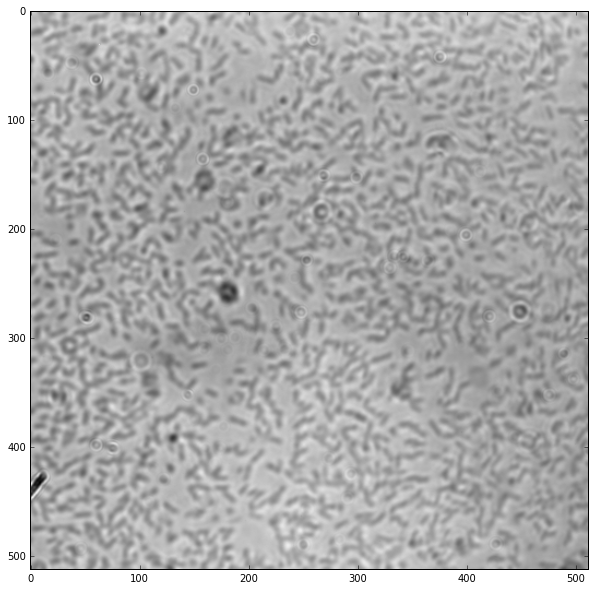

In [4]:
show(frames.mean(axis=0))

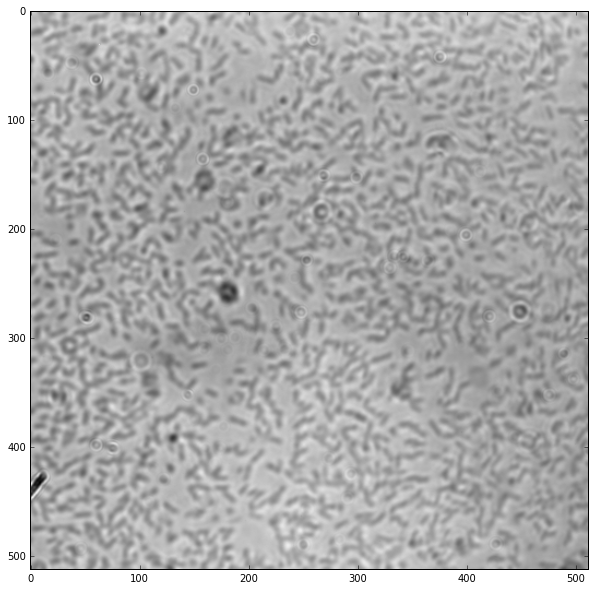

In [5]:
# Compute variance of pixels across all frames
pixel_var = np.mean(frames, axis=0)
avg = pixel_var
show(pixel_var)

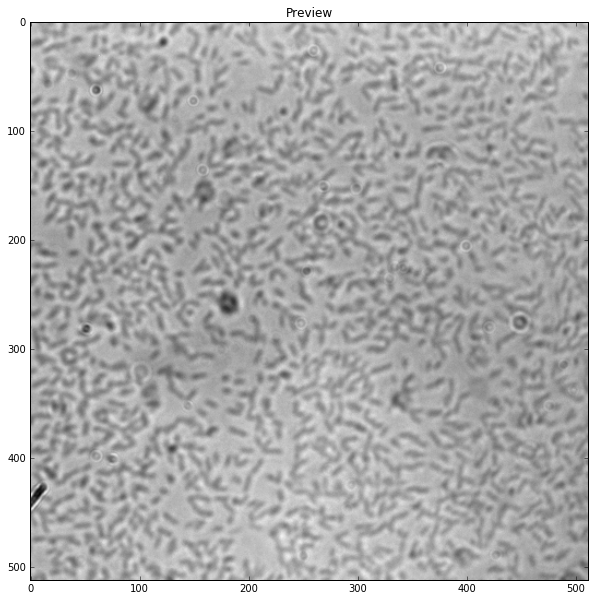

In [6]:
# Preview a frame
preview_image = frames[0]
plt.figure()
plt.title('Preview')
plt.imshow(preview_image)
plt.show()

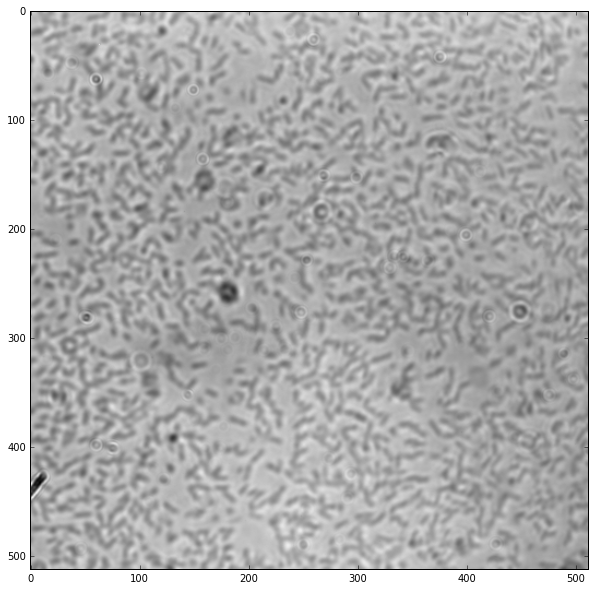

In [7]:
avg = np.mean(frames, axis = 0)
plt.imshow(avg)

In [8]:
f = tp.locate(avg, diameter=13, invert=False) #change 15 later, need to tune
f = f[(f['ecc'] < 0.1)
       ]
f.head() # shows the first few rows of data

,x,y,mass,size,ecc,signal,raw_mass,ep
7,491.336877,10.881598,1454.767912,3.425367,0.098970,30.663180,22500.447,0.122318
13,159.201034,17.868676,1185.731837,3.555402,0.092155,24.263908,21366.901,0.144857
20,139.949665,23.846357,1313.717284,3.713917,0.084917,24.797180,22060.222,0.130184
22,237.380241,26.944096,1659.811263,3.616762,0.019387,30.929816,22105.528,0.129328
25,390.072238,28.624692,1624.081993,3.617847,0.044865,29.329998,22213.545,0.127332


Axes(0.125,0.125;0.775x0.775)


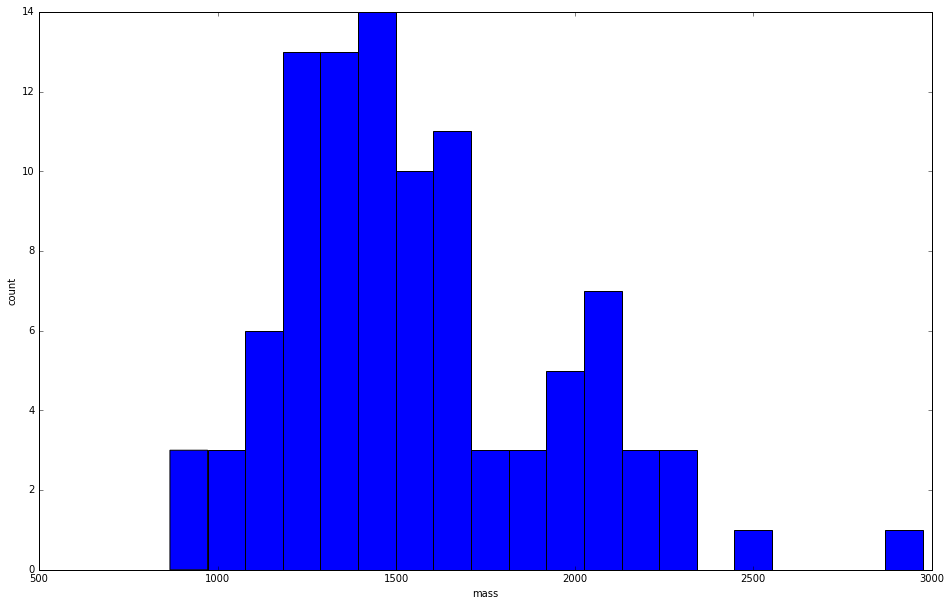

In [9]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
print ax
# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

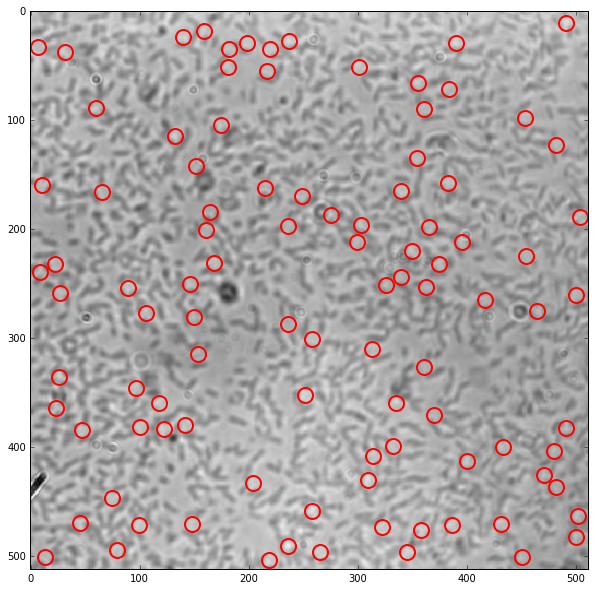

In [10]:
plt.figure()  # make a new figure
tp.annotate(f, avg);
# tp.annotate(f, avg);
#possibly filter particles using ecc vals stationary cells will not look circular

In [11]:
f

,x,y,mass,size,ecc,signal,raw_mass,ep
7,491.336877,10.881598,1454.767912,3.425367,0.098970,30.663180,22500.447,0.122318
13,159.201034,17.868676,1185.731837,3.555402,0.092155,24.263908,21366.901,0.144857
20,139.949665,23.846357,1313.717284,3.713917,0.084917,24.797180,22060.222,0.130184
22,237.380241,26.944096,1659.811263,3.616762,0.019387,30.929816,22105.528,0.129328
25,390.072238,28.624692,1624.081993,3.617847,0.044865,29.329998,22213.545,0.127332
26,198.965950,28.787331,1401.707279,3.905995,0.048585,20.797635,21926.989,0.132769
28,6.460731,33.143007,1269.722287,4.285952,0.070998,23.997271,21199.456,0.148910
30,181.582103,34.654982,867.101402,3.541226,0.096482,17.864635,20761.276,0.160675
31,219.904084,34.538429,1273.188559,3.746971,0.089347,18.931181,21748.113,0.136404
33,31.390172,37.243118,1443.302549,3.688198,0.089613,26.130362,20976.572,0.154671


In [12]:
centers = []
num_elems = len(f.x) # number of particles detected
xs = list(f.x)
ys = list(f.y)
for i in range(num_elems):
    x = xs[i]
    y = ys[i]
    center = [x, y]
    centers.append(center)
radius = 20 #pixel radius

In [13]:
angs=[]
for i in np.linspace(0,360,24): #select num. intervals per circle.
    angs.append(i)

In [14]:
w, l = 2.45, radius # choose dimensions of mask
mymask = np.array([[w,0],[-w,0],[-w,l],[w,l]])

In [15]:
def create_rot_mask(orig_mask, deg):
    rotmymask = []
    ang = radians(deg)
    for i in orig_mask:
        rotMatrix = np.array([[cos(ang), -sin(ang)], [sin(ang),  cos(ang)]])
        rotmymask.append(list(rotMatrix.dot(i)))
    return np.array(rotmymask)

def adj_ctr_mask(mask, deg, cell_num):
    adj_mask = []
    rotated_mask_about_00 = create_rot_mask(mask, deg)
    for mask_boundary in rotated_mask_about_00:
        # Move the origin of the mask to the center of the bacterium.
        # (Mask is originally at origin (0,0).)
        adj_mask.append(list(mask_boundary+centers[cell_num]))
    return np.array(adj_mask)

In [16]:
def angle_kym(ang, cell_num):
    ang_ar=[]
    t0 = time.time()
    for i in range(frames.shape[0]):
#         print "Step1", time.time() - t0
        frame = frames[i].astype(np.uint8)
        box = np.int64(adj_ctr_mask(mymask, ang, cell_num)) # this is the box rotated at ang deg.
#         print "Step2", time.time() - t0
        cv2.drawContours(frame,[box],0,(0,0,0),1)
#         print "Step3", time.time() - t0
#         if i == 0 and ang == 0: # shows the windows on top of 75th frame
#             show(frame) # only showing filter do a 360 on first frame.
        mask = np.zeros(frame.shape,np.uint8)
        cv2.drawContours(mask,[box],0,1,-1) # cv2.drawContours(mask,[box],0,255,-1)
#         print "Step4", time.time() - t0
        ang_ar.append(cv2.mean(frame,mask=mask)[0])
#         print "Step5", time.time() - t0
    return ang_ar # for each frame, computes the pixel average for a window rot'd at a given theta 

In [17]:
def invert_colors(kymograph):
    kymograph -= kymograph.min()
    kymograph /= kymograph.max()
    return (1-kymograph) * 255

In [18]:
def build_kymograph(cell_num):
    kymograph = []
    for ang in angs:
        kymograph.append(angle_kym(ang, cell_num))
    return np.array(kymograph)

In [ ]:
kymograph_images = None
def compute_trace(kymograph):
    trace = []
    # Remove background by subtracting median of each vertical column from itself.
    no_background=[]
#     orig = np.copy(kymograph)
    orig = kymograph
    for i in range(orig.shape[1]):
        # black cells on white background (switch signs if reversed)
        no_background.append(orig[:,i]-np.median(orig,1)) 
    no_background=np.array(no_background).T
    
    # Change negative values to 0.
    clipped_background = no_background.clip(min=0)
    
    ## Hacky
    kymograph_images.append(clipped_background)
    ##
    
    # Extract 1D signal using LA trick.
    def exp_func(x):
        return np.dot(np.arange(len(x)), np.power(x, 10))/(np.sum(np.power(x, 10)))
    weighted_sum = np.apply_along_axis(exp_func,0, clipped_background)
    
    # Derivative of 1D signal. Continuous parts show angular velocity of cell (not 100% sure on this.)
    conv = np.convolve([-1.,1],weighted_sum, mode='full')[:-1]
    median_filtered_conv = median_filter(conv, 7) #pick window size based on result. second arg and odd number.

    trace = [median_filtered_conv]
    
    return trace

In [ ]:
bacterial_traces = []
kymograph_images = []
for cell_num in range(num_elems):
    t0 = time.time()
    print 'Percent complete:', cell_num*1./num_elems, '%'
    kymograph = build_kymograph(cell_num)
    print "step1", time.time() - t0
    # kymograph = invert_colors(kymograph) -- this line for black cells on white background
    trace = compute_trace(kymograph)
    print "step2", time.time() - t0
    bacterial_traces.append(trace)

Percent complete: 0.0 %
step1 4.32780408859
step2 4.83940315247
Percent complete: 0.010101010101 %
step1 4.5298101902
step2 5.03250718117
Percent complete: 0.020202020202 %
step1 6.51371598244
step2 7.23403310776
Percent complete: 0.030303030303 %
step1 5.40704917908
step2 5.82445406914
Percent complete: 0.040404040404 %
step1 4.55523300171
step2 5.01712799072
Percent complete: 0.0505050505051 %
step1 4.81086802483
step2 5.32111310959
Percent complete: 0.0606060606061 %
step1 4.0228509903
step2 4.46037387848
Percent complete: 0.0707070707071 %
step1 4.26273989677
step2 4.95030283928
Percent complete: 0.0808080808081 %
step1 4.90710115433
step2 5.33943414688
Percent complete: 0.0909090909091 %
step1 3.98517918587
step2 4.40649008751
Percent complete: 0.10101010101 %
step1 5.10654187202
step2 5.68666791916
Percent complete: 0.111111111111 %
step1 4.16425395012
step2 4.62570691109
Percent complete: 0.121212121212 %
step1 4.02268695831
step2 4.45222878456
Percent complete: 0.131313131313 %

In [ ]:
# plot angular vs time
# delta theta/delta t
# input: video
# output: vel plots per cell

In [ ]:
def plot_kymograph(idx):
    plt.title('Kymograph', fontsize=20)
    plt.ylabel('Angles', fontsize=20)
    plt.xlabel('Frame', fontsize=20)
    plt.imshow(kymograph_images[idx][:,:300])

In [ ]:
plot_kymograph(3)

In [ ]:
#A weighted sum of the vertical columns, which relates the max intensity in a column to its position.
# def exp_func(x):
#     return np.dot(np.arange(len(x)), np.power(x, 10))/(np.sum(np.power(x, 10)))

# weighted_sum = np.apply_along_axis(exp_func,0, clipped_background)

plt.xlabel('Frame', fontsize=20)
plt.ylabel('Angle', fontsize=20)
plt.title('Kymograph with Position Detected', fontsize=20)
plt.plot(weighted_sum, 'r-', lw = 3)
plt.imshow(clipped_background,cmap='gray')

In [ ]:
# #Derivative of 1D signal. Continuous parts show angular velocity of cell (not 100% sure on this.)
# conv = np.convolve([-1.,1],weighted_sum, mode='full')[:-1]
plt.plot(conv)

In [ ]:
# #Derivative of 1D signal. Continuous parts show angular velocity of cell (not 100% sure on this.)
# from scipy.ndimage.filters import median_filter
# median_filtered_conv = median_filter(conv, 7) #pick window size based on result. second arg and odd number.
plt.figure(figsize=(plt.figaspect(.265))) 
plt.axhline(0, 0, len(median_filtered_conv), linewidth=3, color='r', ls ='--')
plt.plot(median_filtered_conv)
plt.xlabel('Frame', fontsize=15)
plt.ylabel('Velocity [angle/frame]', fontsize=15)
plt.title('Angular Velocity', fontsize=20)

In [ ]:
#Tells when the derivative changes sign.
signs=np.sign(conv)
plt.plot(signs)
plt.ylim(-1.2,1.2)

In [ ]:
from scipy.ndimage.filters import median_filter

In [ ]:
#Applies median filter to above signal.
filtered_signs=median_filter(signs, 5) #pick window size based on result. second arg and odd number.
plt.plot(filtered_signs)
plt.ylim(-1.2,1.2)

In [ ]:
#Returns the indices (frame locations) of when the sign switches.
def sign_switch(oneDarray):
    inds=[]
    for ind in range(len(oneDarray)-1):
        if (oneDarray[ind]<0 and oneDarray[ind+1]>0) or (oneDarray[ind]>0 and oneDarray[ind+1]<0):
            inds.append(ind)
    return np.array(inds)

In [ ]:
switched_frames = sign_switch(filtered_signs)
switched_frames

#Positive values correspond to cw rotation. Negative = ccw rotation.
cw, ccw=[],[]
for i in range(len(filtered_signs)):
    if filtered_signs[i]<0:
        ccw.append(i)
    if filtered_signs[i]>0:
        cw.append(i)
cw, ccw = np.array(cw), np.array(ccw)

In [ ]:
import matplotlib.patches as mpatches
num_frames = orig.shape[1]
#Plot horiz. line s.t. color represents detected dir. of rotation.
sign_colors = ['green' if np.sign(value)==1 else 'red' for value in filtered_signs]
plt.scatter(np.arange(num_frames), np.ones(num_frames)*100, color=sign_colors, marker='s')

red_patch = mpatches.Patch(color='red', label='Counterclockwise')
green_patch = mpatches.Patch(color='green', label='Clockwise')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), handles=[green_patch, red_patch], loc=3, ncol=2, mode="expand", borderaxespad=0, fontsize=20)

#Plot vertical line where switch detected.
for frame in switched_frames:
    plt.axvline(frame, linewidth=3, color='b', ls ='--')

#Show original image in background.
plt.imshow(np.flipud(orig), cmap='gray', extent=(0,orig.shape[1],360,0), aspect='.265')

plt.gca().invert_yaxis()
plt.xlabel('Frame',fontsize=20)
plt.ylabel('Angle (deg)', fontsize=20)
plt.show()

In [ ]:
# def print_to_csv(input1, title):
#     input_list = list(input1)
#     with open(title + ".csv", "wb") as csvfile:
#         out = csv.writer(csvfile)
#         out.writerow(['name','Category'])
#         for i in range(0, len(input_list)):
#             out.writerow([str(i+1), str(input_list[i])])

In [ ]:
def get_date(path_to_tif):
    # Parse timestamp strings from the XML 
    # of the Metamorph metadata.
    # Returns an equivalent numpy array (in miliseconds).
    scope_times = []
    scope_tif_file = tifffile.TiffFile(path_to_tif)
    for t in range(len(scope_tif_file)):
        metadata = scope_tif_file[t].image_description
        root = xml.etree.ElementTree.fromstring(metadata).find('PlaneInfo')        
        for neighbor in root:
            if neighbor.attrib['type'] == 'time':
                if neighbor.attrib['id'] == 'acquisition-time-local':
                    first = neighbor.attrib['value']
                    return first

In [ ]:
def print_to_csv(data, fname, names, meta):
    acquisition_time = get_date(tifname)
    with open(fname + ".csv", "wb") as f:
        f.write("Velocity Data," + '\n')
        f.write(tifname + ',\n')
        f.write(acquisition_time + ',\n,\n')
        f.write('time (ms),velocity\n')
        T = len(data[0])
        Cells = len(data)
        for t in range(T):
            new_row_in_file = str(meta[t]) + ','
            for cell_data in range(Cells-1):
                new_row_in_file += (str(data[cell_data][t]) + ',')
            new_row_in_file += (str(data[Cells-1][t]))
            f.write(new_row_in_file + '\n')
    f.close()

In [ ]:
print_to_csv([median_filtered_conv], 'test_csv', [tifname], meta)

In [ ]:
# Goal:
# * Filter particles better
# * Organize code
# * Write data to .csv
# Want csv to contain "rawest" data possible (traces)